<a href="https://colab.research.google.com/github/ayanhussain81/SalesEstimator-using-linear-regression/blob/main/SalesEstimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
import numpy as np 
import pandas as pd
import seaborn as ans
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/Advertising_data.csv'
data = pd.read_csv(path)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,2210
1,44.5,39.3,45.1,1040
2,17.2,45.9,69.3,930
3,151.5,41.3,58.5,1850
4,180.8,10.8,58.4,1290


# SIMPLR LINEAR REGRESSION 

In [ ]:
#Iniltializing the varibles
X = data['TV'].values.reshape(-1,1)
y=data['sales'].values.reshape(-1,1)

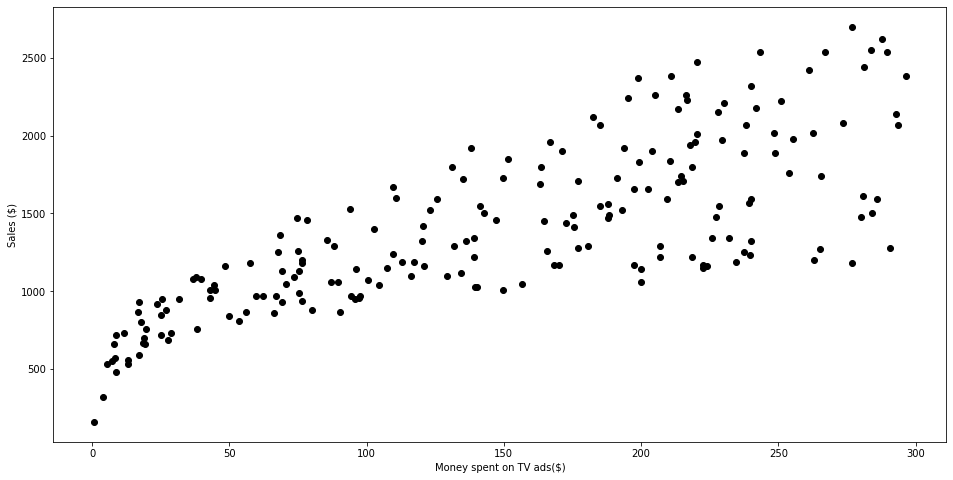

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(X,y , c='black')
plt.xlabel("Money spent on TV ads($)")
plt.ylabel("Sales ($)")
plt.show()

In [ ]:
#spliting our data into train and test datasets
X_train , X_test, y_train , y_test = train_test_split(X,y , test_size= 0.3 , random_state=42)

In [ ]:
#Fitting linear regression to training set 
reg = LinearRegression()
reg.fit(X_train,y_train)

# prediction the test result 
y_pred = reg.predict(X_test)


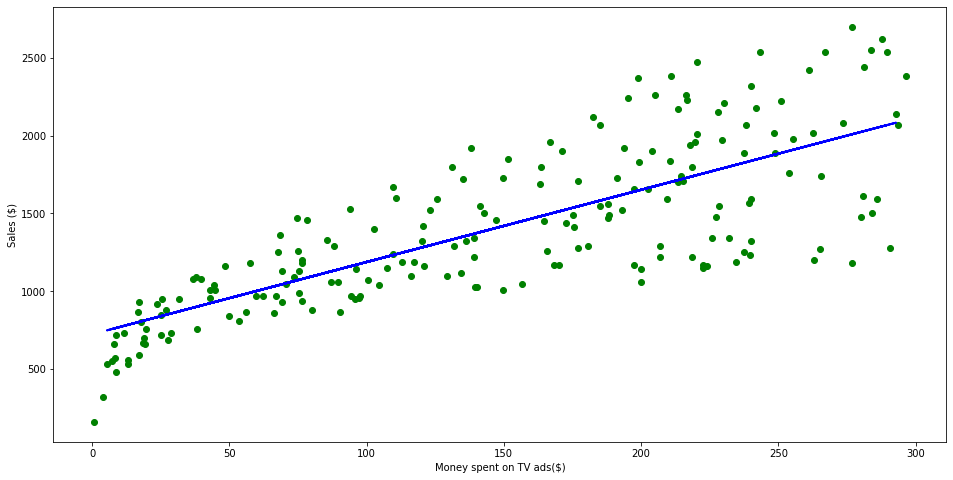

In [ ]:
#plotting the prediction 
plt.figure(figsize=(16,8))
plt.scatter(X,y, c='green')
plt.plot(
    X_test ,
    y_pred,
    c='blue',
    linewidth= 2
)

plt.xlabel("Money spent on TV ads($)")
plt.ylabel("Sales ($)")
plt.show()

In [ ]:
#calculating the coefficient
reg.coef_

array([[4.64078021]])

In [ ]:
#Calculating the intercept 
reg.intercept_


array([723.94598308])

In [ ]:
#          Calculating the r sq value
r2_score(y_test , y_pred)

0.6714477229302764

In [ ]:
output = reg.predict([[230.1]])
output

array([[1791.78951004]])

# MULTIPLE REGRESSION 

In [ ]:
#Iniltializing the varibles
X = data.drop(['sales'],axis=1)
y=data['sales'].values.reshape(-1,1)

In [ ]:
# spliting our data into train and test datasets
X_train , X_test, y_train , y_test = train_test_split(X,y , test_size= 0.3 , random_state=42)

In [ ]:
#Fitting linear regression to training set 
multiple_reg = LinearRegression()
multiple_reg.fit(X_train,y_train)

# prediction the test result 
y_pred = multiple_reg.predict(X_test)


In [ ]:
#calculating the coefficient
multiple_reg.coef_

array([[ 4.4059281 , 19.92874969,  0.68824522]])

In [ ]:
#Calculating the intercept 
multiple_reg.intercept_

array([270.89490925])

In [ ]:
#          Calculating the r sq value
r2_score(y_test , y_pred)

0.8609466508230368

In [ ]:
#Taking the input from the user 
print("Enter the amount you will invest on:")
tv = float(input("TV : "))
radio = float(input("Radio : "))
newspaper = float(input("Newspaper : "))

#predicting the sales with respects to the input 
output = multiple_reg.predict([[tv , radio , newspaper]])
print("you will get Rs {:.2f} sales by advertising Rs{} on TV, Rs{} on Radio and Rs{} on newspaper."\
      .format(output[0][0] if output else "not predictable",tv,radio,newspaper))

Enter the amount you will invest on:
TV : 7888
Radio : 455
Newspaper : 15555
you will get Rs 54798.09 sales by advertising Rs7888.0 on TV, Rs455.0 on Radio and Rs15555.0 on newspaper.


SAVING THE MODLE 

In [ ]:
if not os.path.exists('models'):
  os.makedirs('models')

MODEL_PATH = "models/mutliple_reg.sav"
pickle.dump(multiple_reg , open(MODEL_PATH , 'wb'))
